# identificando dígitos em um conjunto de dados de dezenas de milhares de imagens escritas à mão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [15]:
#Explorando o que tem dentro do arquivo.
digitos = load_digits()
dir(digitos)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
#Mostrando os 5 primeiros números em preto e branco.
plt.gray()
for i in range(5):
    plt.matshow(digitos.images[i])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digitos.data, digitos.target, test_size = 0.2)

In [5]:
modelo = LogisticRegression().fit(X_train, y_train)

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
#Calculando o coeficiente de determinação para saber o score.
modelo.score(X_test, y_test)

0.975

In [7]:
previsao = modelo.predict(X_test)
previsao

array([9, 2, 9, 8, 8, 6, 9, 0, 1, 6, 3, 1, 9, 3, 1, 2, 3, 2, 7, 0, 0, 9,
       8, 0, 4, 3, 9, 5, 6, 9, 8, 5, 0, 4, 9, 6, 0, 3, 1, 2, 5, 2, 1, 7,
       6, 5, 4, 4, 6, 2, 0, 0, 4, 7, 5, 1, 4, 7, 6, 1, 2, 6, 2, 8, 5, 9,
       6, 5, 6, 9, 9, 6, 1, 5, 6, 9, 0, 4, 7, 8, 1, 8, 7, 1, 5, 2, 8, 0,
       1, 8, 4, 7, 9, 6, 6, 7, 6, 4, 1, 1, 3, 2, 6, 2, 3, 0, 1, 8, 2, 8,
       4, 2, 2, 7, 4, 1, 4, 2, 2, 5, 3, 0, 2, 4, 0, 2, 4, 8, 2, 3, 9, 1,
       9, 9, 3, 8, 0, 4, 9, 5, 6, 1, 8, 0, 5, 6, 5, 4, 2, 7, 1, 5, 0, 8,
       4, 3, 7, 0, 6, 2, 4, 6, 1, 6, 8, 3, 5, 7, 1, 1, 4, 4, 7, 3, 9, 7,
       0, 4, 0, 6, 6, 8, 6, 8, 1, 5, 7, 5, 6, 7, 1, 9, 1, 2, 4, 1, 4, 3,
       8, 1, 9, 6, 7, 5, 7, 6, 6, 8, 4, 3, 9, 1, 2, 7, 8, 4, 3, 1, 7, 2,
       5, 3, 0, 5, 1, 5, 7, 3, 4, 6, 1, 6, 9, 7, 3, 2, 9, 0, 3, 5, 3, 8,
       6, 9, 6, 4, 6, 4, 8, 9, 0, 9, 3, 6, 6, 0, 9, 4, 2, 5, 8, 8, 6, 2,
       9, 3, 0, 4, 4, 3, 6, 6, 8, 2, 0, 6, 1, 9, 4, 9, 5, 7, 1, 7, 0, 9,
       8, 3, 0, 2, 4, 9, 4, 5, 2, 2, 4, 6, 6, 8, 3,

In [8]:
cm = confusion_matrix(y_test, previsao)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  1,  2,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

Text(69.0, 0.5, 'Realidade')

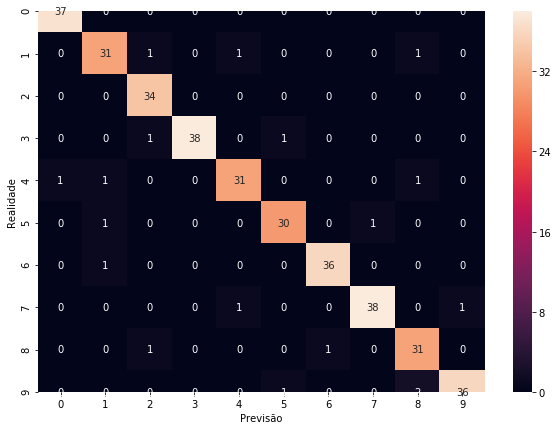

In [43]:
#Com a matriz confusão é possível ver quantas vezes o modelo errou. Por exemplo: 1 vez o modelo previu que 5 fosse 1.
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Previsão')
plt.ylabel('Realidade')
